In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 999.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycl

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow
from PIL import Image

In [ ]:
# rf = Roboflow(api_key="EY6St7F7xkNaKPgXPeLm")
# project = rf.workspace("tsec-hacks-2024").project("pdf-sa0sp")
# dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PDF-1 in yolov5pytorch:: 100%|██████████| 840/840 [00:00<00:00, 6502.39it/s]


In [ ]:
rf = Roboflow(api_key="EY6St7F7xkNaKPgXPeLm")
project = rf.workspace("tsec-hacks-2024").project("pdf-sa0sp")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PDF-1 in yolov8:: 100%|██████████| 840/840 [00:00<00:00, 6265.33it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/PDF-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

In [ ]:
img=Image(filename='./runs/detect/train/confusion_matrix.png', width=640)

TypeError: 'module' object is not callable

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 134, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 215, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 709, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 634, in torch_safe_load
    ckpt = torch.load(file, map_location="cpu")
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened_file:
 

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 134, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 215, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 709, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 634, in torch_safe_load
    ckpt = torch.load(file, map_location="cpu")
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened_file:
 

##Trying model

In [ ]:
from PIL import Image
from torchvision import transforms

In [ ]:
from ultralytics import YOLO

# Define the model path
model_path = "/content/runs/detect/train2/weights/best.pt"

# Load the model using TorchScript
model = YOLO(model_path)

In [ ]:
# transform = transforms.Compose([
#     transforms.Resize((640, 640)),  # Resize the image to a fixed size
#     transforms.ToTensor(),           # Convert the image to a PyTorch tensor
# ])

In [ ]:
image=Image.open("img1.png")

In [ ]:
# Define the padding length
padding_length = 10  # Adjust this value as needed

def pad_boxes(boxes, image_size, padding_length):
  padded_boxes = torch.clone(boxes)
  padded_boxes[:, :2] = torch.clamp(boxes[:, :2] - padding_length, min=0)
  padded_boxes[:, 2:] = torch.clamp(boxes[:, 2:] + padding_length, max=image_size)
  return padded_boxes

# Get image size from model input or image itself
image_size = ...  # Replace with actual image size

# Pass your image through the model to get bounding boxes


# Pad the bounding boxes



WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(4, 640, 640) is incompatible.


RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[1, 4, 640, 640] to have 3 channels, but got 4 channels instead

In [ ]:
results=model(image)


0: 416x640 1 tables, 15.2ms
Speed: 3.8ms preprocess, 15.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 640)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'tables'}
 obb: None
 orig_img: array([[[29, 29, 29],
         [29, 29, 29],
         [29, 29, 29],
         ...,
         [29, 29, 29],
         [29, 29, 29],
         [29, 29, 29]],
 
        [[29, 29, 29],
         [29, 29, 29],
         [29, 29, 29],
         ...,
         [29, 29, 29],
         [29, 29, 29],
         [29, 29, 29]],
 
        [[29, 29, 29],
         [29, 29, 29],
         [29, 29, 29],
         ...,
         [29, 29, 29],
         [29, 29, 29],
         [29, 29, 29]],
 
        ...,
 
        [[27, 27, 27],
         [28, 28, 28],
         [28, 28, 28],
         ...,
         [54, 54, 54],
         [54, 54, 54],
         [54, 54, 54]],
 
        [[27, 27, 27],
         [28, 28, 28],
         [28, 28, 28],
         ...,
         [43, 43, 43],
         [43, 43, 43],
         [43, 43, 43]],
 
        [[27, 27, 27],
    

In [ ]:
!pip install pytesseract

In [ ]:
!which tesseract

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

In [ ]:
import pytesseract

In [ ]:
import cv2

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9226], device='cuda:0')
data: tensor([[8.1125e+02, 7.6648e+02, 3.6712e+03, 2.2203e+03, 9.2260e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (2560, 4096)
shape: torch.Size([1, 6])
xywh: tensor([[2241.2163, 1493.3862, 2859.9402, 1453.8160]], device='cuda:0')
xywhn: tensor([[0.5472, 0.5834, 0.6982, 0.5679]], device='cuda:0')
xyxy: tensor([[ 811.2461,  766.4781, 3671.1863, 2220.2942]], device='cuda:0')
xyxyn: tensor([[0.1981, 0.2994, 0.8963, 0.8673]], device='cuda:0')


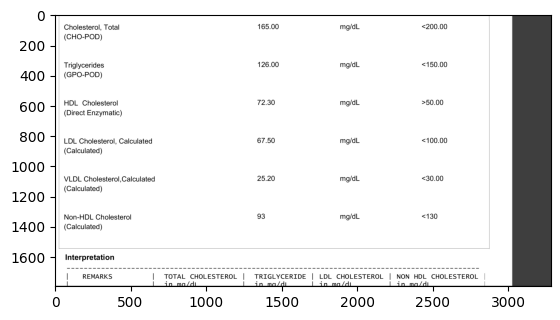

TesseractError: (2, 'Usage: pytesseract [-l lang] input_file')

In [ ]:
img = cv2.imread('img1.png')
plt.imshow(img)
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    for box in boxes:
       print(box)
       x_min, y_min, width, height = box.xyxy[0].cpu().numpy()
       x_max, y_max =int(x_min + width),int( y_min + height)
       x_min,y_min=int(x_min),int(y_min)
       cropped_roi = img[y_min:y_max, x_min:x_max]
       import matplotlib.pyplot as plt
       plt.imshow(cropped_roi)
       plt.show()
       text=pytesseract.image_to_string(cropped_roi)
       print(text)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9226], device='cuda:0')
data: tensor([[8.1125e+02, 7.6648e+02, 3.6712e+03, 2.2203e+03, 9.2260e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (2560, 4096)
shape: torch.Size([1, 6])
xywh: tensor([[2241.2163, 1493.3862, 2859.9402, 1453.8160]], device='cuda:0')
xywhn: tensor([[0.5472, 0.5834, 0.6982, 0.5679]], device='cuda:0')
xyxy: tensor([[ 811.2461,  766.4781, 3671.1863, 2220.2942]], device='cuda:0')
xyxyn: tensor([[0.1981, 0.2994, 0.8963, 0.8673]], device='cuda:0')


In [ ]:
for result in results:
    boxes = result.boxes
    for box in boxes:
      print(box.xyxy[0].cpu().numpy())

[     811.25      766.48      3671.2      2220.3]


In [ ]:
import torch

In [ ]:
# torch.save(model, 'yolov8_model.pt')
torch.save(model.state_dict(), 'yolov8x_model_state.pt')